# 회귀분석  
하나 혹은 그 이상의 특성들이 레이블에 미치는 영향을 추정하는 통계기법  
수학적 모델(선형방정식)을 가정하여 측정된 변수들의 데이터들로부터 추정하는 통계적 방법  
특성의 값에 의하여 레이블의 값을 예측하기 위함  

### 종류
단순 회귀 : 특성 개수 1개, 레이블과 직선 관계인 경우(단일 변수, 일차식)  
y = wx +b  
다중 회귀 : 특성 개수 N개, 레이블과 선형 관계인 경우(다변수, 일차식)  
y = w1x1+w2x2+...+wnxn+b  
다항 회귀 : 특성 개수 N개, 레이블과 비선형 관계인 경우(다변수, 고차다항식)  
비선형 회귀 분석 : 회귀 식의 모양이 선형 관계로 이루어져 있지 않는 모델  

### 회귀 분석 성능 평가
R-Squared : 실제값의 분산 대비 예측값의 분산 비(1-실제분산/예측분산) => 1~음수 스케일, 클수록 성능 좋음.  
MAE(평균절대오차) : 편차의 절대값의 평균  
MSE(평균제곱오차) : 편차의 제곱의 평균(분산) 이상치에 민감함(제곱을 하기 때문에 수치가 뻥튀기됨.)  
위 둘은 작을수록 좋으나, 과적합 우려  
RMSE(제곱근평균제곱오차) : (표준편차). 이상치에 덜 민감함.(제곱근을 하기 때문에 수치가 다시 작아짐.)  

### 구현방법
최소 제곱법(OLS) : 잔차(예측 값과 실제 값의 차이) 제곱의 합이 최소가 되도록 기울기와 편향을 찾음.  
                   장점 : 간단한 식 유도 가능  
                   단점 : 데이터 많아지면 계산량 매우 증가(하나하나 비교하므로), 데이터 이상치 있는 경우 성능 하락.  
              
경사 하강법 :   

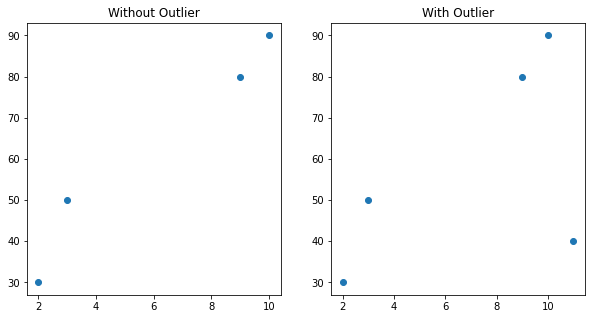

In [1]:
# 최소제곱법 구현

import numpy as np

# 이상치 미존재
x1 = np.array([10, 9, 3, 2])
y1 = np.array([90, 80, 50, 30])

# 이상치 존재
x2 = np.array([10, 9, 3, 2, 11])
y2 = np.array([90, 80, 50, 30,40])

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1)
plt.title('Without Outlier')

plt.subplot(1, 2, 2)
plt.scatter(x2, y2)
plt.title('With Outlier')
plt.show()

In [2]:
# 최소제곱법 함수 구현
def OLS(x,y):
    w = np.sum((x-x.mean())*(y-y.mean()))/np.sum((x-x.mean())**2)
    b = y.mean() - w * x.mean()
    return w, b

6.6 22.900000000000006
3.4285714285714284 34.0


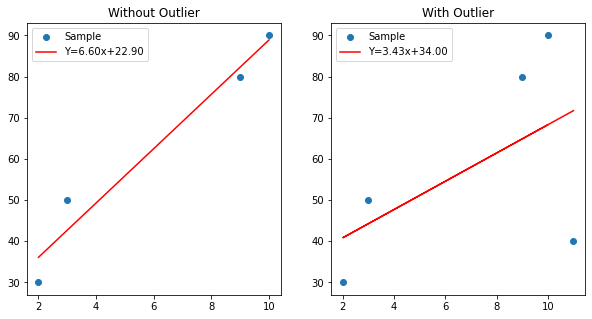

In [3]:
# 이산치가 없는 경우 최소제곱법 적용
w1, b1 = OLS(x1,y1)
print(w1, b1)

# 이산치가 있는 경우 최소제곱법 적용
w2, b2 = OLS(x2,y2)
print(w2, b2)

# 에측값 계산
x1_pred = x1 * w1 + b1
x2_pred = x2 * w2 + b2

# 시각화
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1, label='Sample')
plt.plot(x1, x1_pred, c='red', label=f'Y={w1:.2f}x+{b1:.2f}')
plt.legend()
plt.title('Without Outlier')

plt.subplot(1, 2, 2)
plt.scatter(x2, y2, label='Sample')
plt.plot(x2, x2_pred, c='red', label=f'Y={w2:.2f}x+{b2:.2f}')
plt.title('With Outlier')
plt.legend()
plt.show()

In [4]:
# 최소제곱법 라이브러리 사용

from sklearn.linear_model import LinearRegression

# 이산치가 없는 경우 최소제곱법 적용
model1 = LinearRegression().fit(x1.reshape(-1,1),y1)
print(model1.coef_, model1.intercept_)

# 이산치가 있는 경우 최소제곱법 적용
model2 = LinearRegression().fit(x2.reshape(-1,1),y2)
print(model2.coef_, model2.intercept_)

[6.6] 22.899999999999984
[3.42857143] 33.99999999999999


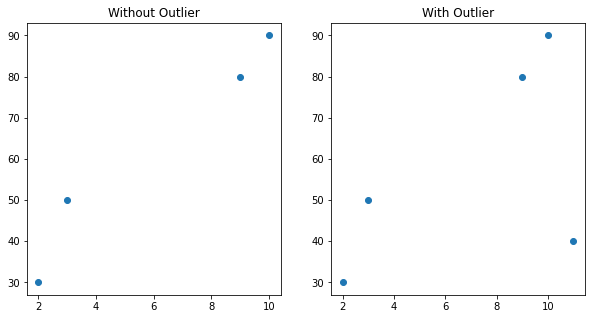

In [5]:
# 에측값 계산
x1_pred = x1 * w1 + b1
x2_pred = x2 * w2 + b2

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1)
plt.title('Without Outlier')

plt.subplot(1, 2, 2)
plt.scatter(x2, y2)
plt.title('With Outlier')
plt.show()

## 이상치 제거

이상치 : 중심에서 많이 떨어져 있는 값  
평균에는 많은 영향을 주지만, 중앙값에는 적은 영향을 줌  
선형알고리즘에서는 제거하는 것이 유리함.

#### 처리방법
1) 표준점수로 변환후 +-3sigma 제거  => 표준정규분포 기준.  
2) IQR(사분범위: 25~75%)을 이용한 제거 => 중앙값 기준, 최대 IQR * 1.5, 최소 IQR * 1.5  
3) 도메인 지식 기반 제거  

In [6]:
# 경고 메시지 끄기
import warnings
warnings.filterwarnings(action='ignore')

# 경고 메시지 나타내기
# action = 'default'

# 보스턴 집값 데이터 불러오기
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
boston_df = pd.DataFrame(
    boston['data'],
    columns=boston['feature_names']
)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
# 가격 항목 생성
boston_df['price'] = boston['target']
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


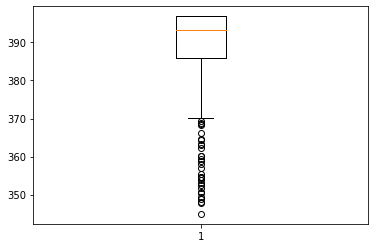

In [19]:
# 이상치 확인
import matplotlib.pyplot as plt
plt.boxplot(boston_df['B'])
plt.show()

In [9]:
# IQR 계산
Q1 = boston_df['B'].quantile(0.25)
Q3 = boston_df['B'].quantile(0.75)
IQR = Q3 - Q1
MIN = Q1 - 1.5*IQR
MAX = Q3 + 1.5*IQR
MIN, MAX

(344.10624999999993, 427.49625000000003)

In [10]:
# 이상치 조회
target = boston_df[(boston_df['B']<MIN) | (boston_df['B']>MAX)]
target

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
18,0.80271,0.0,8.14,0.0,0.538,5.456,36.6,3.7965,4.0,307.0,21.0,288.99,11.69,20.2
25,0.84054,0.0,8.14,0.0,0.538,5.599,85.7,4.4546,4.0,307.0,21.0,303.42,16.51,13.9
27,0.95577,0.0,8.14,0.0,0.538,6.047,88.8,4.4534,4.0,307.0,21.0,306.38,17.28,14.8
32,1.38799,0.0,8.14,0.0,0.538,5.950,82.0,3.9900,4.0,307.0,21.0,232.60,27.71,13.2
34,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,21.0,248.31,20.34,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,3.77498,0.0,18.10,0.0,0.655,5.952,84.7,2.8715,24.0,666.0,20.2,22.01,17.15,19.0
467,4.42228,0.0,18.10,0.0,0.584,6.003,94.5,2.5403,24.0,666.0,20.2,331.29,21.32,19.1
475,6.39312,0.0,18.10,0.0,0.584,6.162,97.4,2.2060,24.0,666.0,20.2,302.76,24.10,13.3
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97,7.0


In [11]:
# 이상치 제거
boston_df = boston_df.drop(target.index)

## 로그 변환

정규분포 모양으로 만드는 방법. |__ => _ | _.    
y값을 변환

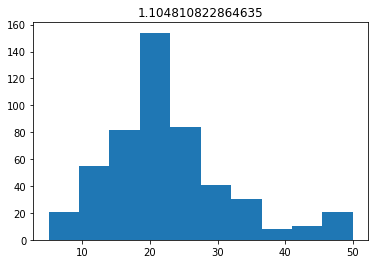

In [22]:
# # 로그변환
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import skew

# # 변환 후 확인
# plt.hist(boston['target'])
# plt.title(f'{skew(boston["target"])}')
# plt.show()

In [13]:
# 선형회귀 모델링
y = boston_df['price']
x = boston_df.drop(columns='price')

# 표준화와 정규화

### 표준화
서로 다른 분포를 비교하기 위해 표준에 맞게 통일 시키는 방법 ==> 표준정규분포 맞게  
제각기 다른 평균과 표준편차를 0과 1로 조정함.  

### 정규화

In [14]:
# 표준화 - case1(강사님 방법, 표준화 후 분할, 권장)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_sc = scaler.fit_transform(x)
x = x_sc

In [15]:
# 정규화 - case1(강사님 방법, 표준화 후 분할, 권장)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_sc = scaler.fit_transform(x)
x = x_sc

In [16]:
# 데이터 분할 - stratify 설정 금지
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(
    x, y, random_state=100
)

In [17]:
# # 표준화 - case2(교재의 방법, 분할 후 표준화, 비권장)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_tr_sc = scaler.fit_transform(x_tr)
# x_te_sc = scaler.transform(x_te)

In [18]:
# 모델링 및 성능검사
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_tr,y_tr)
print(model.score(x_tr,y_tr),model.score(x_te,y_te))

0.7333970447189131 0.7605037585652703


# 경사하강법

가설에 의한 비용이 최소화 되는 직선을 구함.  
비용 계산을 위한 함수가 필요, 주로 MSE 사용.  
비용함수를 미분하여 비용이 낮아지는 방향으로 가중치 값을 변경하는 알고리즘.  
H = Wx+b  
비용함수, cost(W,b) : H(x^i)와 y^i의 분산(y는 실제값, H(x)는 예측값, i는 순번)  
비용함수의 편미분함수 : 하강속도(learning rate)  
하강속도 : 비용함수의 값이 최적값에 근접할 수록 차이가 적어지므로, 더 미세하게 조정해야 정밀한 값을 구할 수 있어 보정치로 둠.  
https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2020-08-24-linear_regression/pic13.mp4(새 탭 열기)  
SGDClassifier, SGDRegressor 등으로 사용 가능함.

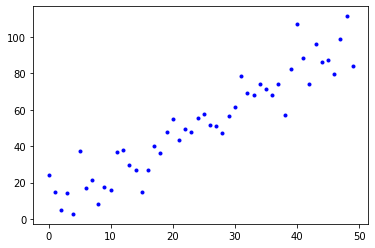

In [40]:
# y = 2x + 10 기반으로 난수 반영하여 함수 생성 => w의 실제 값 2

X = np.arange(50)
Y = (2 * X) + 10 * np.random.randn(50)
plt.plot(X, Y, 'b.')
plt.show()

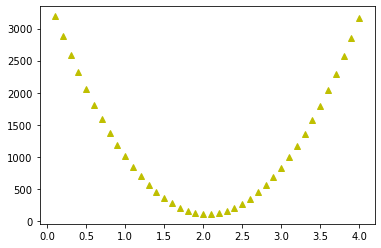

In [41]:
# 경사 하강법 구현

# 기울기 0.0 부터 4.0 까지 기울기를 변경해 봄.
w_range = np.arange(0.1, 4.1, 0.1)
costs = []
for w in w_range:
    h = w * X
    cost = 1/ 50 * np.sum((h-Y)**2)
    costs.append(cost)
# 시각화
plt.plot(w_range,costs,'y^')
plt.show()
# 시각화 결과 오차가 최소가 되는 w의 최솟값이 2.0이 나옴 => 가장 잘 맞는 w값이 나옴.

## 선형회귀 vs 다항회귀

# 다항 회귀
1차식이 아닌 2차식 이상의 다항식으로 변형하여 분석.  
다항식의 차수가 높을수록 정확도는 올라가나 과적합의 우려가 있음.  


In [53]:
# 선형 회귀 모델링 및 성능검사
from sklearn.linear_model import LinearRegression
X = X.reshape(-1,1)
model = LinearRegression().fit(X,Y)
model.score(X,Y)
print(model.coef_,model.intercept_)

[1.83666931] 7.178173529966145


In [43]:
# 예측값
pred = model.predict(X)

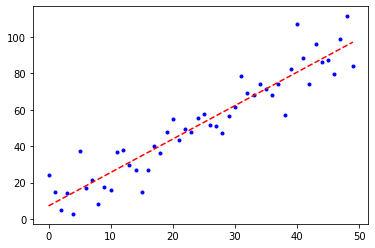

In [47]:
# 예측값 시각화
plt.plot(X,Y,'b.')
plt.plot(X,pred,'r--')
plt.show()

In [63]:
# 다항 변환 2차식 (단일변수)
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=2)
x = np.arange(10).reshape(-1, 1)
pd.DataFrame(P.fit_transform(x), columns=P.get_feature_names())
# 1 : 상수항, x0 : 1차항, x0^2 : 2차항

,1,x0,x0^2
0,1.0,0.0,0.0
1,1.0,1.0,1.0
2,1.0,2.0,4.0
3,1.0,3.0,9.0
4,1.0,4.0,16.0
5,1.0,5.0,25.0
6,1.0,6.0,36.0
7,1.0,7.0,49.0
8,1.0,8.0,64.0
9,1.0,9.0,81.0


In [64]:
# 다항 변환 2차식 (다변수)
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=2)  # include_bais=False => 상수항 제거
x = np.arange(10).reshape(-1, 2)
pd.DataFrame(P.fit_transform(x), columns=P.get_feature_names())
# 1 : 상수항, x0 : 1차항, x0^2 : 2차항, x0 x1 : 1차 교차항 (x+y+1)^2 = x^2 + y^2 + 2xy(얘가 교차항) + 2x +2y +1

,1,x0,x1,x0^2,x0 x1,x1^2
0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,2.0,3.0,4.0,6.0,9.0
2,1.0,4.0,5.0,16.0,20.0,25.0
3,1.0,6.0,7.0,36.0,42.0,49.0
4,1.0,8.0,9.0,64.0,72.0,81.0


# 보스턴에 다항 회귀 적용


In [69]:
# 보스턴 다항 변환 2차식
P = PolynomialFeatures(degree=2, include_bias=False)
x_poly = P.fit_transform(boston_df.loc[:, 'CRIM':'LSTAT'])
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state=0)
boston_df.loc[:, 'CRIM':'LSTAT'].shape, x_poly.shape

((429, 13), (429, 104))

In [72]:
# 선형 회귀 모델링 및 성능검사
model = LinearRegression().fit(x_tr, y_tr)
print(model.score(x_tr, y_tr), model.score(x_te, y_te))

# 다항 회귀 모델링 및 성능검사
model = LinearRegression().fit(x_train, y_train)
print(model.score(x_train, y_train), model.score(x_test, y_test))

# 과적합 상태임.

0.7333970447189131 0.7605037585652703
0.9515600110929708 -1.8577085247464904


In [73]:
# 보스턴 다항 변환 3차식
P = PolynomialFeatures(degree=3, include_bias=False)
x_poly = P.fit_transform(boston_df.loc[:, 'CRIM':'LSTAT'])
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state=0)
boston_df.loc[:, 'CRIM':'LSTAT'].shape, x_poly.shape

((429, 13), (429, 559))

In [74]:
# 선형 회귀 모델링 및 성능검사
model = LinearRegression().fit(x_tr, y_tr)
print(model.score(x_tr, y_tr), model.score(x_te, y_te))

# 다항 회귀 모델링 및 성능검사
model = LinearRegression().fit(x_train, y_train)
print(model.score(x_train, y_train), model.score(x_test, y_test))

# 과적합 상태임. 더 심화 됨.

0.7333970447189131 0.7605037585652703
1.0 -689.7085142551108


In [75]:
# 보스턴 다항 변환 5차식
P = PolynomialFeatures(degree=5, include_bias=False)
x_poly = P.fit_transform(boston_df.loc[:, 'CRIM':'LSTAT'])
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state=0)
boston_df.loc[:, 'CRIM':'LSTAT'].shape, x_poly.shape

((429, 13), (429, 8567))

In [76]:
# 선형 회귀 모델링 및 성능검사
model = LinearRegression().fit(x_tr, y_tr)
print(model.score(x_tr, y_tr), model.score(x_te, y_te))

# 다항 회귀 모델링 및 성능검사
model = LinearRegression().fit(x_train, y_train)
print(model.score(x_train, y_train), model.score(x_test, y_test))

# 과적합 상태임. 역시 심화 됨.

0.7333970447189131 0.7605037585652703
1.0 -346.41381263325417


원인 : 이상치를 제거하였음.